# Spectrum Calibration
Using the data from Khalifa calibrate the energy spectra

In [1]:
# import necessary modules
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, IndexLocator
import raadpy as rp
import numpy as np
from scipy.signal import savgol_filter
import os

# Define some constants
raw_dir = '../../Data/FULL_DATA/'
# raw_dir = '../../Data/TAIL/'
# SD      = '2022-09-19' 
# raw_dir = '../../Data/Light-1/light1-'+SD+'/'

# Get the subfiles and put the in a dictionary
fnames      = os.listdir(raw_dir)
filenames   = {}
for i in range(1,10): 
    res = [name for name in fnames if f'buff{i}' in name]
    if len(res)>0: filenames[f'buff{i}'] = res[0]
for name in fnames: 
    if 'log' in name: filenames['log'] = name

print(filenames)
%matplotlib widget

{'buff1': 'light1-2022-03-04-buff1.dat', 'buff2': 'light1-2022-08-04-buff2.dat', 'buff3': 'light1-2022-08-02-buff3.dat', 'buff4': 'light1-2022-03-04-buff4.dat', 'buff5': 'light1-2022-03-04-buff5.dat', 'buff6': 'light1-2022-03-08-buff6.dat', 'buff7': 'light1-2022-03-08-buff7.dat', 'log': 'light1-se-log.txt'}


In [2]:
# data = rp.get_dict(raw_dir+filenames['buff3'],struct=rp.TGF_STRUCT,VERIFY=True,STUPID=False,threshold=1e10,LAST=4000000)
# data = rp.get_dict(raw_dir+filenames['buff5'],struct=rp.NONVETO_STRUCT,VERIFY=True,STUPID=True,threshold=4*1e6,LAST=4000000)
data_calib = rp.get_dict('./pmt_scene3_co60_pos0.bin',struct=rp.NONVETO_STRUCT,VERIFY=False,STUPID=True,threshold=4*1e6)#,LAST=4000000)

Line:   0%|          | 0/223046 [00:00<?, ?it/s]

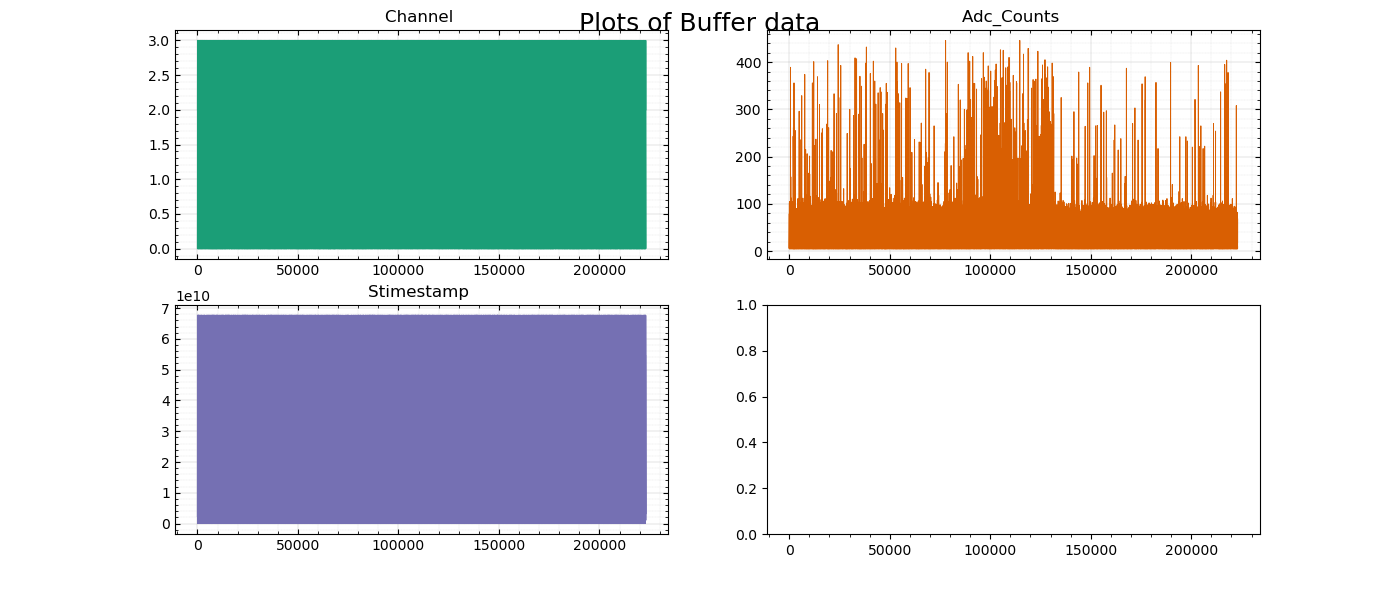

In [3]:
rp.plot_buffer(data_calib);

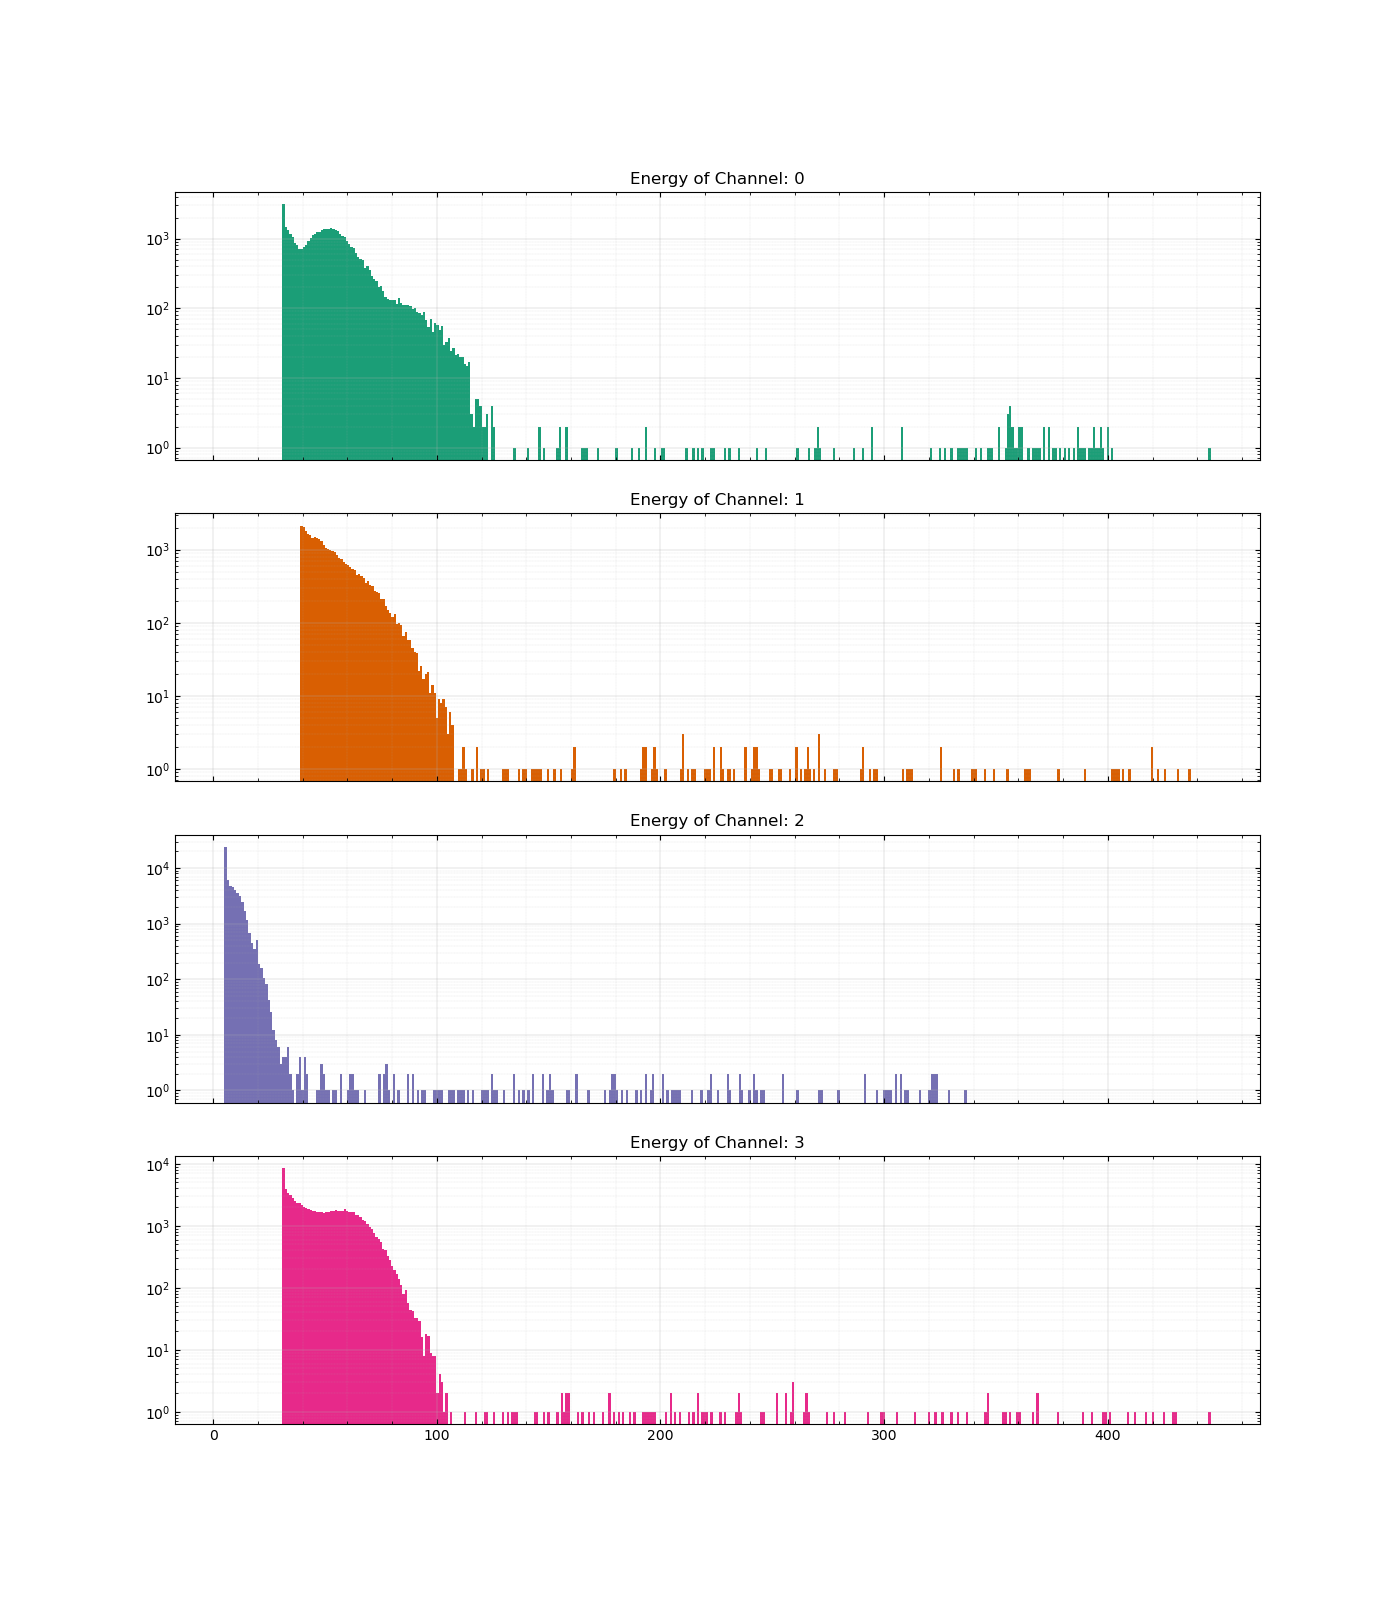

In [13]:
# Get the splitted channels
RANGE   = None
struct  = rp.NONVETO_STRUCT
bins    = 410 #990
channels,idx = rp.split_channels(data_calib)

# Create a figure
fig,ax  = plt.subplots(len(channels),1,figsize=(14,4*len(channels)),dpi=100,sharex=True)
ax      = ax.flatten()
colors  = rp.cm.get_cmap('Dark2').colors

# Get the maximum energy
ADC_max = max([max(channel['adc_counts']) for channel in channels])

calibration_peaks = [[[0,0],[403.6,10]],[[0,0],[427.8,10]],[[0,0],[323.9,10]],[[0,0],[422.0,10]]]

# Plot the histogram of each channel
for i,channel in enumerate(channels):
    # Calibrate
    x0 = calibration_peaks[i][0][0]
    x1 = calibration_peaks[i][1][0]
    e0 = calibration_peaks[i][0][1]
    e1 = calibration_peaks[i][1][1]
    a  = (e0-e1)/(x0-x1)
    b  = (e1*x0-e0*x1)/(x0-x1)
    
    # apply the calibration
    calibrated = channel['adc_counts']#*a + b

    ax[i].hist(calibrated,bins=int(bins/ADC_max*max(channel['adc_counts'])),range=RANGE,color=colors[i%len(channels)])

    ax[i].set_title('Energy of Channel: %d'%i)
    ax[i].set_yscale('log')
    ax[i].tick_params(axis='both',which='both',direction='in',top=True,right=True)
    ax[i].xaxis.set_minor_locator(AutoMinorLocator())
    ax[i].grid(axis='both', which='major', lw=0.25)
    ax[i].grid(axis='both', which='minor', lw=0.2, ls=':')
